In [1]:
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from tensorflow.keras.utils import to_categorical  # ✅ Correct import
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ✅ Correct import
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.models import Sequential, model_from_json
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ✅ Remove `%matplotlib inline` if using Jupyter Notebook outside a script


In [2]:
import os
import numpy as np
import cv2
import skimage.transform
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical  # ✅ Correct import

# Set Image Size
imageSize = 50

# ✅ Use raw string (recommended) or double backslashes
train_dir = r"C:\Users\rnjre\OneDrive\Desktop\asl_alphabet_train"  # ✅ Corrected path

# Function to Load Data
def get_data(folder):
    """
    Load images and labels from the given folder.
    """
    X = []
    y = []
    
    # Define mapping of folder names to labels
    label_map = {char: i for i, char in enumerate(
        ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
         'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])}

    for folderName in os.listdir(folder):
        folder_path = os.path.join(folder, folderName)  # ✅ Corrected path joining
        if os.path.isdir(folder_path) and folderName in label_map:  # ✅ Check if it's a directory
            label = label_map[folderName]
            for image_filename in tqdm(os.listdir(folder_path), desc=f"Processing {folderName}"):
                img_path = os.path.join(folder_path, image_filename)  # ✅ Correct path
                img_file = cv2.imread(img_path)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    X.append(np.asarray(img_file))
                    y.append(label)

    return np.asarray(X), np.asarray(y)

# Load Train Data
X_train, y_train = get_data(train_dir)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Encode Labels
y_trainHot = to_categorical(y_train, num_classes=29)  # ✅ 29 classes (A-Z + 3 extras)
y_testHot = to_categorical(y_test, num_classes=29)

print("✅ Data Loaded Successfully!")
print(f"Training Samples: {X_train.shape}, Testing Samples: {X_test.shape}")


Processing Z: 100%|███████████████████████████████████████████████████████████████| 3000/3000 [00:25<00:00, 119.47it/s]


✅ Data Loaded Successfully!
Training Samples: (69600, 50, 50, 3), Testing Samples: (17400, 50, 50, 3)


In [3]:
# Shuffle data to permit further subsampling
from sklearn.utils import shuffle
X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
X_train = X_train[:30000]
X_test = X_test[:30000]
y_trainHot = y_trainHot[:30000]
y_testHot = y_testHot[:30000]

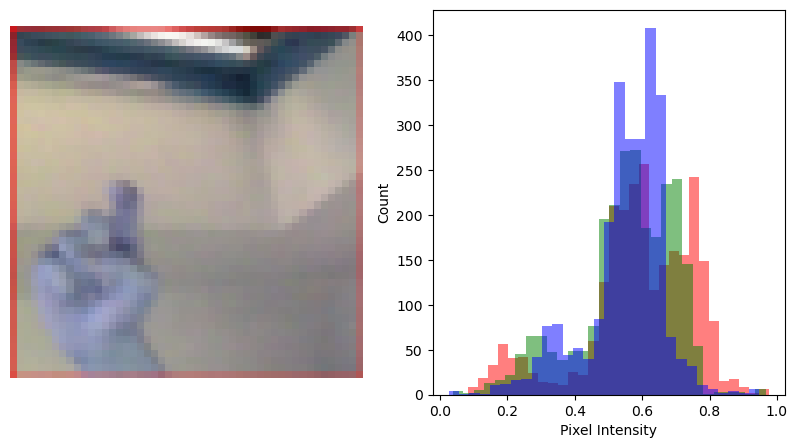

In [4]:
def plotHistogram(a):
    """
    Plot histogram of RGB Pixel Intensities
    """
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    plt.axis('off')
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5);
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5);
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5);
plotHistogram(X_train[1])

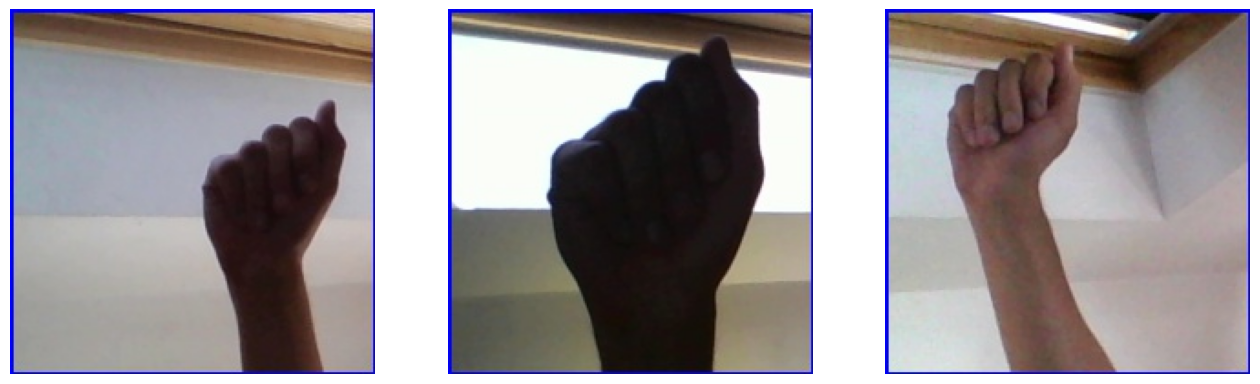

In [5]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob

# ✅ Update the directory path to match your dataset location
train_dir = r"C:\Users\rnjre\OneDrive\Desktop\asl_alphabet_train"

# ✅ Load images from a specific category (e.g., "A")
multipleImages = glob(os.path.join(train_dir, "A", "*.*"))  # ✅ Matches all image types

# Function to plot three random images
def plotThreeImages(images):
    if len(images) < 3:
        print("Not enough images to display.")
        return
    
    r = random.sample(images, 3)  # ✅ Select 3 random images
    plt.figure(figsize=(16, 16))

    for i in range(3):
        img = cv2.imread(r[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ✅ Convert BGR to RGB for correct colors
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

# ✅ Display the images
plotThreeImages(multipleImages)


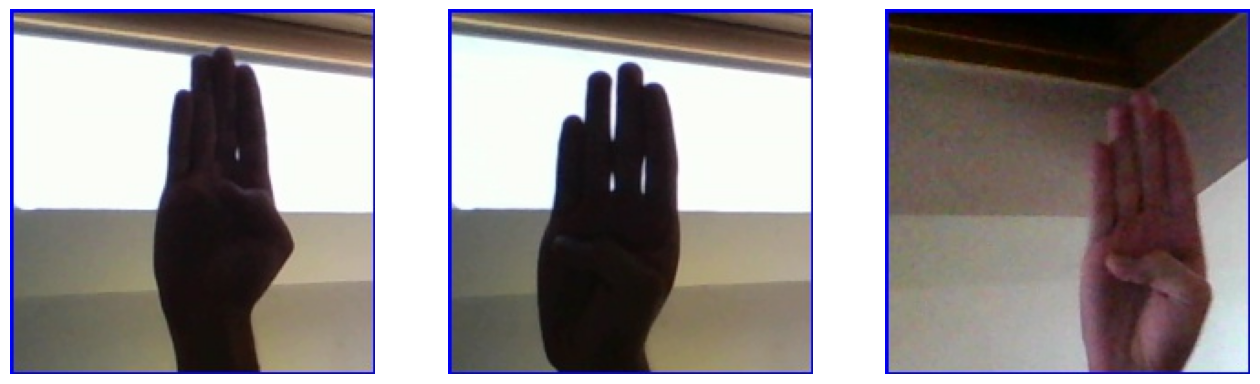

In [6]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob

# ✅ Update the directory path to match your dataset location
train_dir = r"C:\Users\rnjre\OneDrive\Desktop\asl_alphabet_train"

# ✅ Load images from a specific category (e.g., "B")
multipleImages = glob(os.path.join(train_dir, "B", "*.*"))  # ✅ Matches all image formats

# Function to plot three random images
def plotThreeImages(images):
    if len(images) < 3:
        print("Not enough images to display.")
        return
    
    r = random.sample(images, 3)  # ✅ Select 3 random images
    plt.figure(figsize=(16, 16))

    for i in range(3):
        img = cv2.imread(r[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ✅ Convert BGR to RGB for correct colors
        plt.subplot(1, 3, i+1)
        plt.imshow(img)
        plt.axis('off')

    plt.show()

# ✅ Display the images from the "B" folder
plotThreeImages(multipleImages)


Category: A


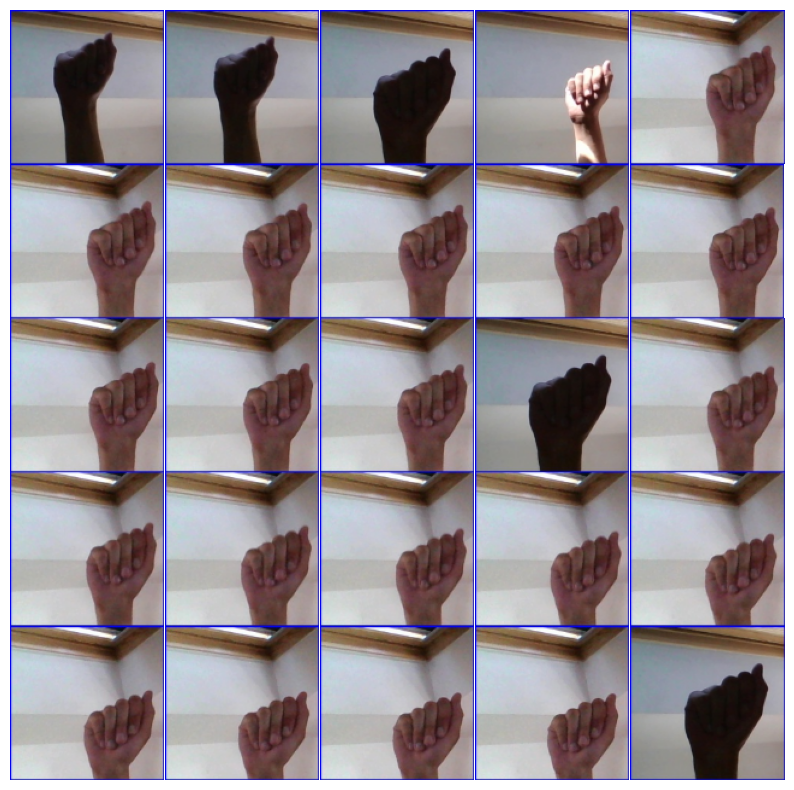

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob

# ✅ Update the directory path to match your dataset location
train_dir = r"C:\Users\rnjre\OneDrive\Desktop\asl_alphabet_train"

# ✅ Load images from the "A" category
multipleImages = glob(os.path.join(train_dir, "A", "*.*"))  # ✅ Matches all image formats

# ✅ Display 25 images
print("Category: A")
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0)

for i, img_path in enumerate(multipleImages[:25]):  # ✅ Take first 25 images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ✅ Convert BGR to RGB for correct colors
    img = cv2.resize(img, (128, 128))

    plt.subplot(5, 5, i+1)  # ✅ Create a 5x5 grid
    plt.imshow(img)
    plt.axis('off')

plt.show()


Category: B


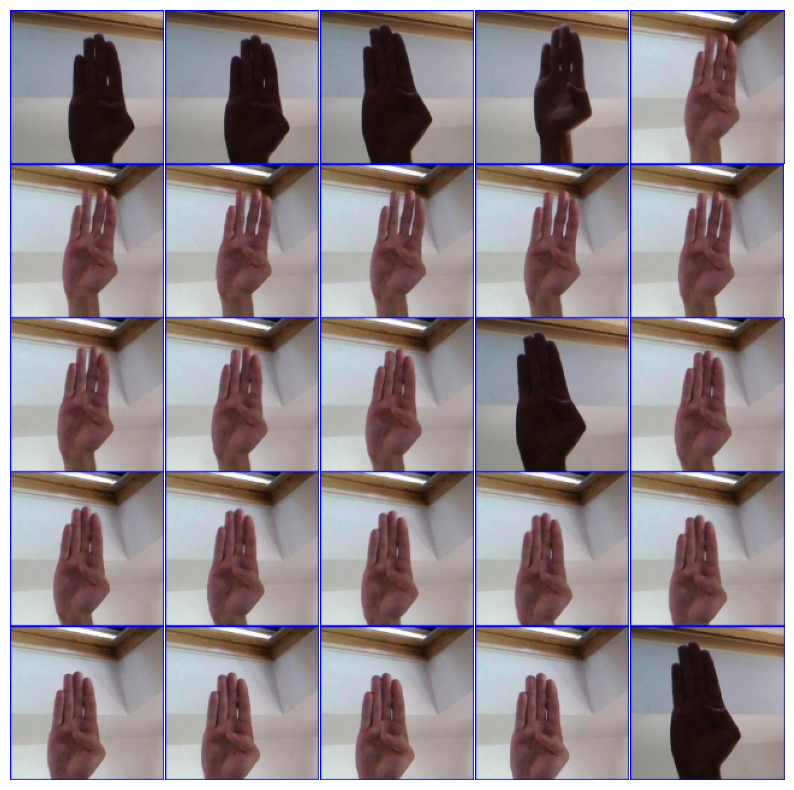

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob

# ✅ Update the directory path to match your dataset location
train_dir = r"C:\Users\rnjre\OneDrive\Desktop\asl_alphabet_train"

# ✅ Load images from the "B" category
multipleImages = glob(os.path.join(train_dir, "B", "*.*"))  # ✅ Matches all image formats

# ✅ Display 25 images
print("Category: B")
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0, hspace=0)

for i, img_path in enumerate(multipleImages[:25]):  # ✅ Take first 25 images
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ✅ Convert BGR to RGB for correct colors
    img = cv2.resize(img, (128, 128))

    plt.subplot(5, 5, i+1)  # ✅ Create a 5x5 grid
    plt.imshow(img)
    plt.axis('off')

plt.show()


{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}


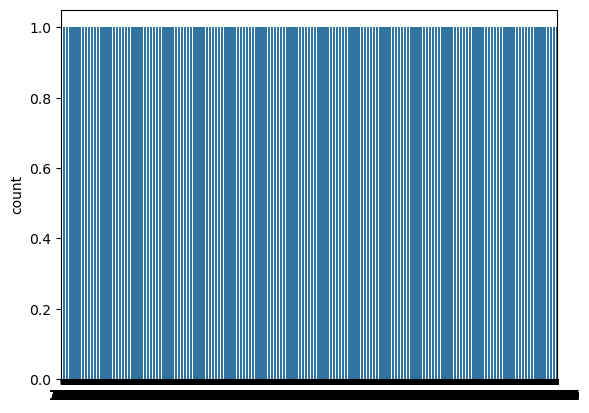

In [9]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 
    9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 
    17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 
    25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 50, 50, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 50, 50, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 25, 25, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 29)                  │          14,877 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,729,565 (56.19 MB)

 Trainable params: 14,877 (58.11 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 551s 586ms/step - accuracy: 0.0991 - loss: 3.3147 - val_accuracy: 0.3050 - val_loss: 2.9602
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 502s 535ms/step - accuracy: 0.3513 - loss: 2.8727 - val_accuracy: 0.4479 - val_loss: 2.6448
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 517s 551ms/step - accuracy: 0.4758 - loss: 2.5720 - val_accuracy: 0.5175 - val_loss: 2.4034
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 536s 571ms/step - accuracy: 0.5416 - loss: 2.3368 - val_accuracy: 0.5764 - val_loss: 2.2118
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 496s 528ms/step - accuracy: 0.5915 - loss: 2.1476 - val_accuracy: 0.6087 - val_loss: 2.0544
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 500s 526ms/step - accuracy: 0.6225 - loss: 2.0014 - val_accuracy: 0.6337 - val_loss: 1.9233
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 494s 527ms/step - accuracy: 0.6451 - loss: 1.8809 - val_accuracy: 0.6528 - val_loss: 1.8115
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 872s 930ms/step - accuracy: 0.6669 -

✅ Model saved at: C:\Users\rnjre\OneDrive\Desktop\asl_model.h5

✅ Keras CNN - Final Accuracy: 82.30%

544/544 ━━━━━━━━━━━━━━━━━━━━ 353s 648ms/step


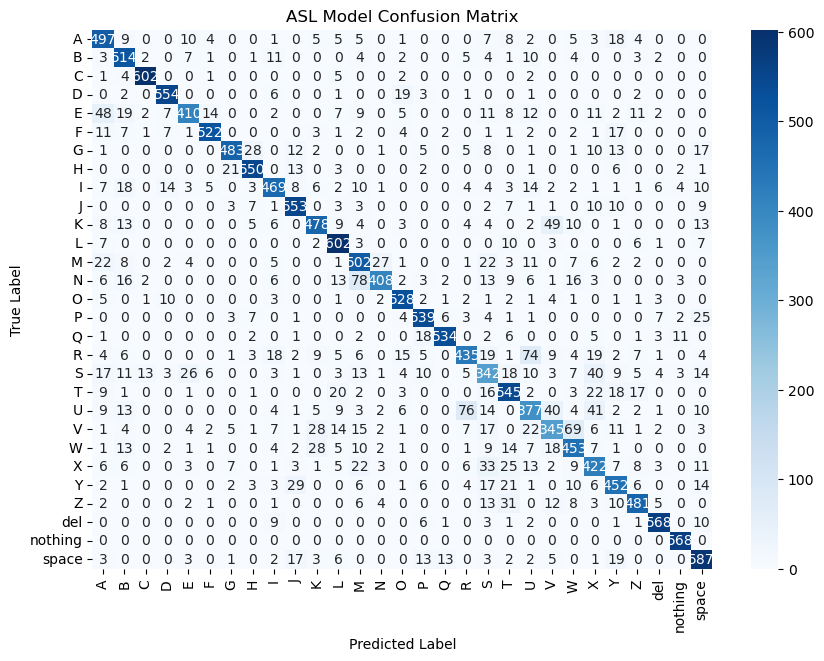


✅ Classification Report:

              precision    recall  f1-score   support

           A       0.74      0.85      0.79       584
           B       0.77      0.90      0.83       574
           C       0.97      0.98      0.97       617
           D       0.92      0.94      0.93       589
           E       0.86      0.71      0.78       580
           F       0.94      0.89      0.91       585
           G       0.92      0.82      0.87       587
           H       0.90      0.92      0.91       599
           I       0.83      0.78      0.81       598
           J       0.86      0.91      0.88       610
           K       0.84      0.78      0.81       609
           L       0.84      0.94      0.88       641
           M       0.71      0.80      0.75       626
           N       0.90      0.70      0.78       587
           O       0.88      0.93      0.90       569
           P       0.88      0.89      0.89       603
           Q       0.96      0.91      0.93       586


✅ Model Loaded Successfully!


In [19]:
from sklearn.utils.class_weight import compute_class_weight
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Fix Paths (Use raw string or double backslashes)
weight_path1 = r"C:\Users\rnjre\OneDrive\Desktop\vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
weight_path2 = r"C:\Users\rnjre\OneDrive\Desktop\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
model_save_path = r"C:\Users\rnjre\OneDrive\Desktop\asl_model.h5"
# ✅ Compute Class Weights Correctly
map_characters1 = map_characters
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight1 = {i: class_weights[i] for i in range(len(class_weights))}

# ✅ Load Pre-trained VGG16 Model
pretrained_model_1 = VGG16(weights=weight_path1, include_top=False, input_shape=(imageSize, imageSize, 3))

# ✅ Define Optimizers
optimizer1 = Adam(learning_rate=0.0001)
optimizer2 = RMSprop(learning_rate=0.0001)

# ✅ Function for Training the Pretrained Model
def pretrainedNetwork(xtrain, ytrain, xtest, ytest, pretrainedmodel, classweight, numclasses, numepochs, optimizer, labels):
    base_model = pretrainedmodel  # Use VGG16 as base

    # Add Custom Layers
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(numclasses, activation='softmax')(x)

    # Create Model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze Base Model Layers
    for layer in base_model.layers:
        layer.trainable = False

    # Compile Model
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    # Display Model Summary
    model.summary()

    # Define Callbacks
    callbacks_list = [EarlyStopping(monitor='val_loss', patience=3, verbose=1)]

    # Train Model
    history = model.fit(
        xtrain, ytrain,
        epochs=numepochs,
        class_weight=classweight,
        validation_data=(xtest, ytest),
        verbose=1,
        callbacks=callbacks_list
    )
    # ✅ Save the Final Model
    model.save(model_save_path)
    print(f"✅ Model saved at: {model_save_path}")
   
     # Evaluate Model
    score = model.evaluate(xtest, ytest, verbose=0)
    print(f"\n✅ Keras CNN - Final Accuracy: {score[1] * 100:.2f}%\n")

    # Predictions
    y_pred = model.predict(xtest)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(ytest, axis=1)

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels.values(), yticklabels=labels.values())
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('ASL Model Confusion Matrix')
    plt.show()

    # Classification Report
    print("\n✅ Classification Report:\n")
    print(classification_report(y_true_classes, y_pred_classes, target_names=labels.values()))

    return model

# ✅ Train the Model
pretrainedNetwork(X_train, y_trainHot, X_test, y_testHot, pretrained_model_1, class_weight1, 29, 30, optimizer1, map_characters1)

# ✅ Load the Model for Future Predictions
loaded_model = load_model(model_save_path)
print("✅ Model Loaded Successfully!")

✅ Model Loaded Successfully!
544/544 ━━━━━━━━━━━━━━━━━━━━ 365s 670ms/step


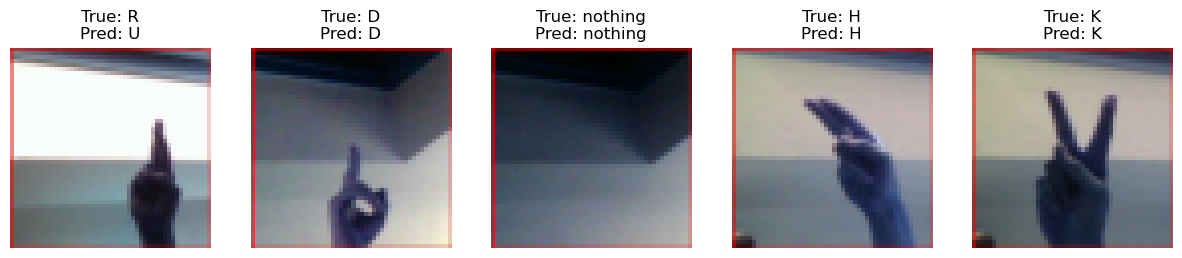

✅ Image 1: True Label = R, Predicted Label = U
✅ Image 2: True Label = D, Predicted Label = D
✅ Image 3: True Label = nothing, Predicted Label = nothing
✅ Image 4: True Label = H, Predicted Label = H
✅ Image 5: True Label = K, Predicted Label = K


In [20]:
import numpy as np
from tensorflow.keras.models import load_model

# ✅ Load the Saved Model
model_path = r"C:\Users\rnjre\OneDrive\Desktop\asl_model.h5"
model = load_model(model_path)
print("✅ Model Loaded Successfully!")

import numpy as np
import matplotlib.pyplot as plt

# ✅ Predict on Test Data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_testHot, axis=1)  # True labels

# ✅ Character Mapping (ASL Labels)
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 
    9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 
    17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 
    25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}

# ✅ Convert Class Labels to Letters
y_pred_labels = [map_characters[i] for i in y_pred_classes]
y_true_labels = [map_characters[i] for i in y_true_classes]

# ✅ Display a Few Predictions
num_samples = 5  # Change to see more predictions
plt.figure(figsize=(15, 5))

for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(X_test[i])  # Show the test image
    plt.axis('off')
    plt.title(f"True: {y_true_labels[i]}\nPred: {y_pred_labels[i]}")

plt.show()

# ✅ Print Sample Predictions
for i in range(num_samples):
    print(f"✅ Image {i+1}: True Label = {y_true_labels[i]}, Predicted Label = {y_pred_labels[i]}")


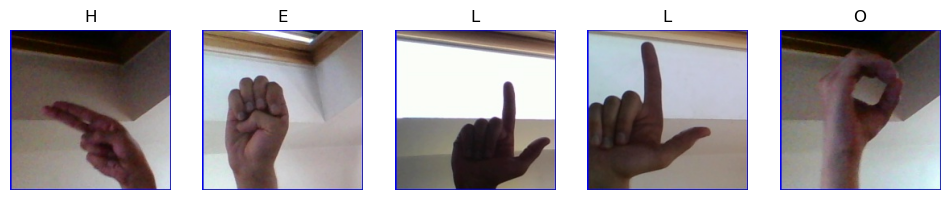

✅ ASL Signs for 'HELLO': ['H', 'E', 'L', 'L', 'O']


In [22]:
import os
import cv2
import random
import matplotlib.pyplot as plt
from glob import glob

# ✅ Update the directory path to match your dataset location
train_dir = r"C:\Users\rnjre\OneDrive\Desktop\asl_alphabet_train"

# ✅ Function to Convert Text to ASL Signs with Images
def text_to_sign(text):
    """
    Convert a given text to corresponding ASL sign images and labels.

    Parameters:
    - text (str): Input text to be converted to ASL sign labels.

    Returns:
    - Display ASL images corresponding to the text.
    """
    text = text.upper()  # Convert to uppercase for matching
    sign_labels = []
    sign_images = []
    
    for char in text:
        if char in map_characters.values():
            sign_labels.append(char)
            char_dir = os.path.join(train_dir, char)  # ✅ Get the directory for the sign
            images = glob(os.path.join(char_dir, "*.*"))  # ✅ Fetch all images
            if images:
                sign_images.append(random.choice(images))  # ✅ Randomly select an image
        elif char == " ":
            sign_labels.append("space")
            char_dir = os.path.join(train_dir, "space")
            images = glob(os.path.join(char_dir, "*.*"))
            if images:
                sign_images.append(random.choice(images))

    # ✅ Display ASL Images
    plt.figure(figsize=(12, 4))
    for i, img_path in enumerate(sign_images):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ✅ Convert BGR to RGB for correct colors
        plt.subplot(1, len(sign_images), i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(sign_labels[i])

    plt.show()

    return sign_labels

# ✅ Example Usage
text = "HELLO"
asl_signs = text_to_sign(text)
print(f"✅ ASL Signs for '{text}': {asl_signs}")


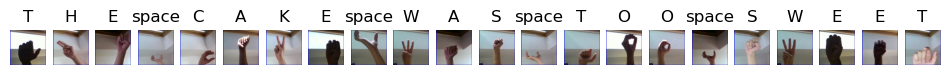

✅ ASL Signs for 'The cake was too sweet': ['T', 'H', 'E', 'space', 'C', 'A', 'K', 'E', 'space', 'W', 'A', 'S', 'space', 'T', 'O', 'O', 'space', 'S', 'W', 'E', 'E', 'T']


In [24]:
# ✅ Example Usage
text = "The cake was too sweet"
asl_signs = text_to_sign(text)
print(f"✅ ASL Signs for '{text}': {asl_signs}")

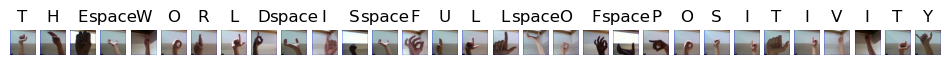

✅ ASL Signs for 'The world is full of positivity': ['T', 'H', 'E', 'space', 'W', 'O', 'R', 'L', 'D', 'space', 'I', 'S', 'space', 'F', 'U', 'L', 'L', 'space', 'O', 'F', 'space', 'P', 'O', 'S', 'I', 'T', 'I', 'V', 'I', 'T', 'Y']


In [25]:
# ✅ Example Usage
text = "The world is full of positivity"
asl_signs = text_to_sign(text)
print(f"✅ ASL Signs for '{text}': {asl_signs}")

In [23]:
def sign_to_text(predictions):
    """
    Convert a list of predicted ASL sign labels back to text.

    Parameters:
    - predictions (list): List of ASL sign labels.

    Returns:
    - String representation of the text.
    """
    text = ""
    for sign in predictions:
        if sign != "space":
            text += sign
        else:
            text += " "
    
    return text

# ✅ Example Usage
predicted_signs = ['H', 'E', 'L', 'L', 'O', 'space', 'W', 'O', 'R', 'L', 'D']
converted_text = sign_to_text(predicted_signs)
print(f"✅ Converted ASL Signs to Text: '{converted_text}'")


✅ Converted ASL Signs to Text: 'HELLO WORLD'


544/544 ━━━━━━━━━━━━━━━━━━━━ 256s 469ms/step


C:\Users\rnjre\AppData\Local\Temp\ipykernel_18720\2536334297.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.savefig("predic_actual.png")
C:\Users\rnjre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


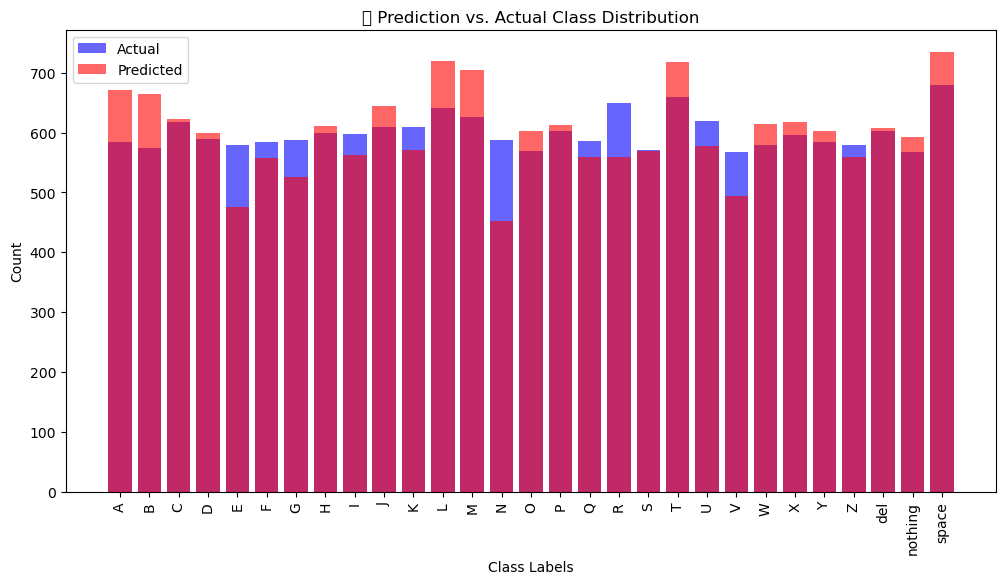

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions_vs_actual(y_true, y_pred, labels):
    """
    Plots a bar chart comparing actual vs predicted labels.
    
    Parameters:
    - y_true: True class labels
    - y_pred: Predicted class labels
    - labels: Dictionary of label mappings
    """
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(labels)), np.bincount(y_true_classes), alpha=0.6, color="blue", label="Actual")
    plt.bar(range(len(labels)), np.bincount(y_pred_classes), alpha=0.6, color="red", label="Predicted")

    plt.xlabel("Class Labels")
    plt.ylabel("Count")
    plt.title("🔍 Prediction vs. Actual Class Distribution")
    plt.xticks(range(len(labels)), labels.values(), rotation=90)
    plt.legend()
    plt.savefig("predic_actual.png")
    plt.show()

# ✅ Generate predictions
y_pred = model.predict(X_test)

# ✅ Call the function
plot_predictions_vs_actual(y_testHot, y_pred, map_characters)


In [31]:
import numpy as np
import pandas as pd

def class_wise_accuracy(y_true, y_pred, labels):
    """
    Computes and displays the accuracy for each class.
    
    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: Dictionary of label mappings
    """
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    class_acc = {}
    
    for i in range(len(labels)):
        correct = np.sum((y_true_classes == i) & (y_pred_classes == i))
        total = np.sum(y_true_classes == i)
        accuracy = correct / total if total != 0 else 0
        class_acc[labels[i]] = accuracy

    # Convert to DataFrame for better visualization
    df_acc = pd.DataFrame(class_acc.items(), columns=["Class", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
    
    # Print results
    print("📌 **Class-wise Accuracy:**")
    print(df_acc)

# ✅ Call the function
class_wise_accuracy(y_testHot, y_pred, map_characters)


📌 **Class-wise Accuracy:**
      Class  Accuracy
27  nothing  1.000000
2         C  0.975689
26      del  0.943522
3         D  0.940577
11        L  0.939158
14        O  0.927944
7         H  0.918197
16        Q  0.911263
9         J  0.906557
1         B  0.895470
15        P  0.893864
5         F  0.892308
28    space  0.863235
0         A  0.851027
25        Z  0.830743
19        T  0.825758
6         G  0.822828
12        M  0.801917
10        K  0.784893
8         I  0.784281
22        W  0.781034
24        Y  0.773973
23        X  0.708054
4         E  0.706897
13        N  0.695060
17        R  0.670262
20        U  0.609047
21        V  0.607394
18        S  0.598949


In [32]:
from collections import Counter

def misclassified_classes(y_true, y_pred, labels):
    """
    Identifies the most common misclassifications.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: Dictionary of label mappings
    """
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    misclassified = []

    for i in range(len(y_true_classes)):
        if y_true_classes[i] != y_pred_classes[i]:  # Model made a mistake
            misclassified.append((labels[y_true_classes[i]], labels[y_pred_classes[i]]))

    misclassified_counts = Counter(misclassified)
    
    print("📌 **Most Common Misclassifications:**")
    for key, value in misclassified_counts.most_common(10):
        print(f"Actual: {key[0]} → Predicted: {key[1]} (Count: {value})")

# ✅ Call the function
misclassified_classes(y_testHot, y_pred, map_characters)


📌 **Most Common Misclassifications:**
Actual: N → Predicted: M (Count: 78)
Actual: U → Predicted: R (Count: 76)
Actual: R → Predicted: U (Count: 74)
Actual: V → Predicted: W (Count: 69)
Actual: K → Predicted: V (Count: 49)
Actual: E → Predicted: A (Count: 48)
Actual: U → Predicted: X (Count: 41)
Actual: U → Predicted: V (Count: 40)
Actual: S → Predicted: X (Count: 40)
Actual: X → Predicted: S (Count: 33)


C:\Users\rnjre\AppData\Local\Temp\ipykernel_18720\3904381836.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Class", y="Error Rate", data=df_error, palette="coolwarm")
C:\Users\rnjre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


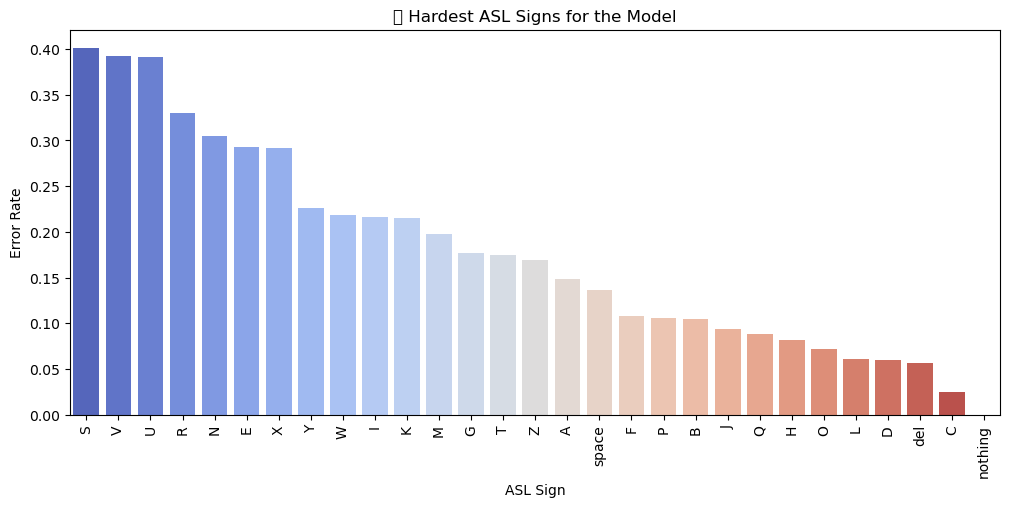

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_difficult_signs(y_true, y_pred, labels):
    """
    Plots a bar chart of the most difficult ASL signs.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: Dictionary of label mappings
    """
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    incorrect_counts = {}

    for i in range(len(labels)):
        incorrect = np.sum((y_true_classes == i) & (y_pred_classes != i))
        total = np.sum(y_true_classes == i)
        error_rate = incorrect / total if total != 0 else 0
        incorrect_counts[labels[i]] = error_rate

    # Convert to DataFrame for better visualization
    df_error = pd.DataFrame(incorrect_counts.items(), columns=["Class", "Error Rate"]).sort_values(by="Error Rate", ascending=False)

    plt.figure(figsize=(12, 5))
    sns.barplot(x="Class", y="Error Rate", data=df_error, palette="coolwarm")
    plt.xticks(rotation=90)
    plt.title("🔍 Hardest ASL Signs for the Model")
    plt.xlabel("ASL Sign")
    plt.ylabel("Error Rate")
    plt.show()

# ✅ Call the function
plot_difficult_signs(y_testHot, y_pred, map_characters)


In [34]:
from sklearn.metrics import classification_report

def detailed_classification_report(y_true, y_pred, labels):
    """
    Prints a detailed classification report.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: Dictionary of label mappings
    """
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print("📌 **Detailed Classification Report:**")
    print(classification_report(y_true_classes, y_pred_classes, target_names=labels.values()))

# ✅ Call the function
detailed_classification_report(y_testHot, y_pred, map_characters)


📌 **Detailed Classification Report:**
              precision    recall  f1-score   support

           A       0.74      0.85      0.79       584
           B       0.77      0.90      0.83       574
           C       0.97      0.98      0.97       617
           D       0.92      0.94      0.93       589
           E       0.86      0.71      0.78       580
           F       0.94      0.89      0.91       585
           G       0.92      0.82      0.87       587
           H       0.90      0.92      0.91       599
           I       0.83      0.78      0.81       598
           J       0.86      0.91      0.88       610
           K       0.84      0.78      0.81       609
           L       0.84      0.94      0.88       641
           M       0.71      0.80      0.75       626
           N       0.90      0.70      0.78       587
           O       0.88      0.93      0.90       569
           P       0.88      0.89      0.89       603
           Q       0.96      0.91      0.93

C:\Users\rnjre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rnjre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128312 (\N{SMALL ORANGE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rnjre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


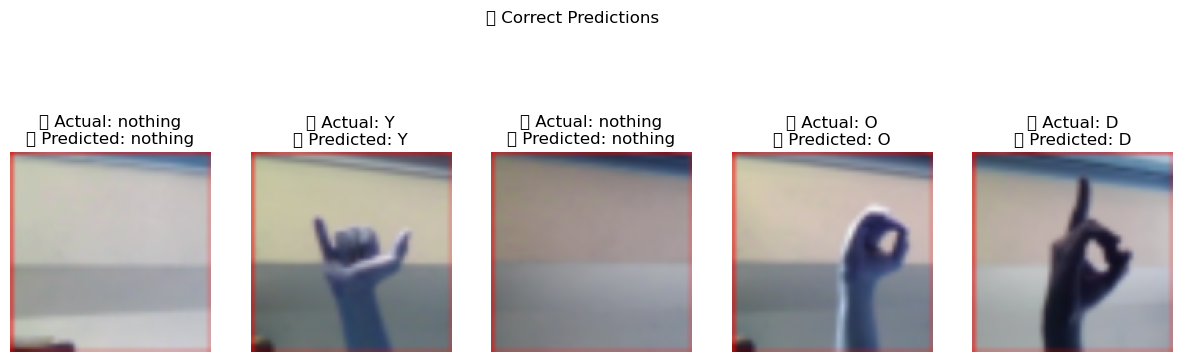

C:\Users\rnjre\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


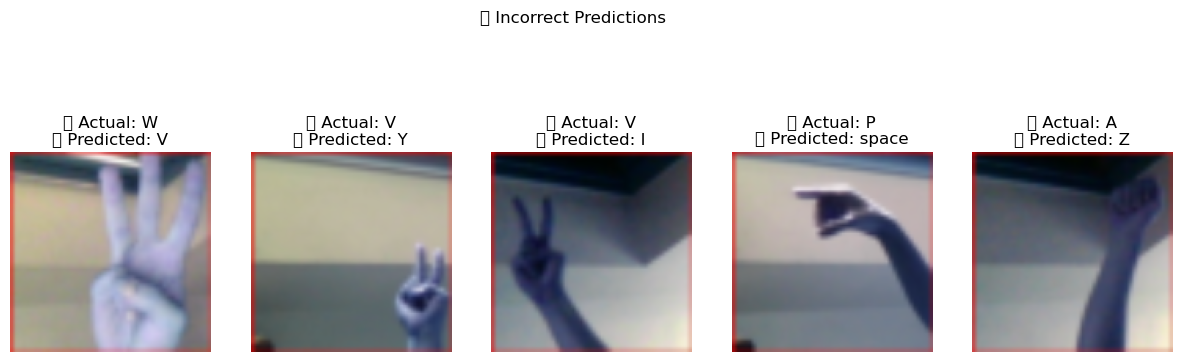

In [35]:
import random
import cv2

def show_sample_predictions(X_test, y_true, y_pred, labels, num_images=5, correct=True):
    """
    Displays sample images of correct or incorrect predictions.

    Parameters:
    - X_test: Test images
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: Dictionary of label mappings
    - num_images: Number of images to display
    - correct: Whether to show correct or incorrect predictions
    """
    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    if correct:
        indices = [i for i in range(len(y_true_classes)) if y_true_classes[i] == y_pred_classes[i]]
        title = "✅ Correct Predictions"
    else:
        indices = [i for i in range(len(y_true_classes)) if y_true_classes[i] != y_pred_classes[i]]
        title = "❌ Incorrect Predictions"

    if len(indices) < num_images:
        print(f"⚠ Not enough samples for {title}. Showing {len(indices)} instead.")
        num_images = len(indices)

    indices = random.sample(indices, num_images)

    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(indices):
        img = X_test[idx]
        img = cv2.resize(img, (128, 128))  # Resize for better display

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"🔹 Actual: {labels[y_true_classes[idx]]}\n🔸 Predicted: {labels[y_pred_classes[idx]]}")

    plt.suptitle(title)
    plt.show()

# ✅ Show Correct Predictions
show_sample_predictions(X_test, y_testHot, y_pred, map_characters, num_images=5, correct=True)

# ✅ Show Incorrect Predictions
show_sample_predictions(X_test, y_testHot, y_pred, map_characters, num_images=5, correct=False)


In [ ]:
import cv2

# Open Webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize & Normalize Image
    img = cv2.resize(frame, (imageSize, imageSize))
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)

    # Predict ASL Letter
    pred = model.predict(img)
    pred_class = np.argmax(pred)
    asl_letter = map_characters[pred_class]

    # Display Prediction
    cv2.putText(frame, f"ASL: {asl_letter}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("ASL Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/